<a href="https://colab.research.google.com/github/nryeo/project1/blob/main/AI_16_%EC%98%A4%ED%98%9C%EC%A7%84_section1%5B2%EC%B0%A8%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

In [3]:
r_data = pd.read_csv(url)

In [ ]:
r_data

In [5]:
r_data.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
r_data.info()
# Unnamed 인덱스인듯 삭제
# 데이터 타입 변경 필요
# Year는 int
# sales들은 float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [7]:
r_data.isna().sum()
# 결측치. 처리는 어떻게?
# 채워넣을 수 있는 건 채워넣기

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
r_data.describe()
# 연도 최솟값이 0임을 확인

,Unnamed: 0,Year
count,16598.000000,16327.000000
mean,8299.500000,1994.242543
std,4791.574219,155.077168
min,1.000000,0.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


(array([  100.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16227.]),
 array([   0.,  202.,  404.,  606.,  808., 1010., 1212., 1414., 1616.,
        1818., 2020.]),
 <a list of 10 Patch objects>)

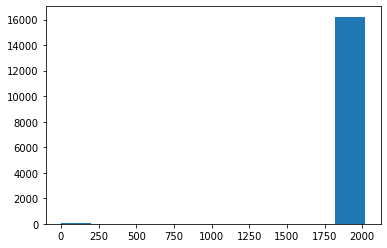

In [9]:
plt.hist(r_data.Year)

(array([ 108.,   64.,   89.,  438., 1261., 2420., 3896., 5220., 2388.,
         343.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <a list of 10 Patch objects>)

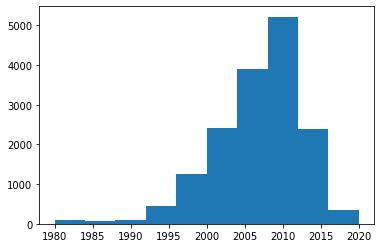

In [10]:
plt.hist(r_data.Year[r_data.Year>=1700])
# 1980년도 이후부터 채택 -> 그 이전은 드랍? 대체?

In [11]:
les1980 = r_data[r_data.Year < 1980]
len(les1980) #100개

100

In [12]:
r_data.loc[r_data.Year < 1980, 'Year']=np.nan # 혹시 중복 대체 가능할지 몰라서 우선 nan으로 변환

In [13]:
r_data.describe()

,Unnamed: 0,Year
count,16598.000000,16227.000000
mean,8299.500000,2006.406052
std,4791.574219,5.827661
min,1.000000,1980.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


In [14]:
r_data.isna().sum() # Year에 결측치 100개 증가 확인

Unnamed: 0       0
Name             0
Platform         0
Year           371
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [16]:
i_data = r_data.drop('Unnamed: 0', axis=1)
i_data.head()

# 인덱스 삭제

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# Genre가 nan인 데이터
missing_Genre = i_data[i_data['Genre'].isna()]
nGenre_Name = missing_Genre['Name'].unique()
nGenre_Name

In [18]:
missing_Genre.shape

(50, 9)

In [ ]:
missing_Genre.duplicated().sum()

0

In [19]:
# Genre가 존재하는 데이터
yesGenre = i_data.copy()
yesGenre = yesGenre.dropna(subset=['Genre'])

# 동일 Name 존재 여부 확인
have_Genre = []

for data in yesGenre['Name']:
    if data in nGenre_Name:
        have_Genre.append(data)

In [20]:
yesGenre.shape

(16548, 9)

In [ ]:
have_Genre #Name이 중복되는 값으로 해당 값의 Genre로 결측 Genre 대체하기 위해 동일한 Name의 리스트를 찾았다

In [21]:
yg_uniq = yesGenre.drop_duplicates(subset='Name')
yg_uniq.shape

(11463, 9)

In [ ]:
# yg_uniq_genre = yg_uniq[['Name','Genre']]
# yg_uniq_genre.head()

,Name,Genre
0,Candace Kane's Candy Factory,Action
1,The Munchables,Action
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure
3,Deal or No Deal: Special Edition,Misc
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform


In [22]:
# have_Genre 기준으로 머지하기

# have_Genre를 DF로
dictodf = {'Name': have_Genre}
df_hg = pd.DataFrame(dictodf)

# Genre를 넣어보자
df_hg = df_hg.merge(yg_uniq, left_on='Name', right_on='Name')
df_hg.head()

# 같은 name을 가진 게임의 genre 결측치를 대체할 수 있는 데이터프레임을 찾았다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,MVP Baseball 2004,GC,2004.0,Sports,Electronic Arts,0.2,0.05,0,0.01
1,MVP Baseball 2004,GC,2004.0,Sports,Electronic Arts,0.2,0.05,0,0.01
2,Skylanders Giants,3DS,2012.0,Action,Activision,0.12,0.01,0,0.01
3,Skylanders Giants,3DS,2012.0,Action,Activision,0.12,0.01,0,0.01
4,Skylanders Giants,3DS,2012.0,Action,Activision,0.12,0.01,0,0.01


In [ ]:
df_hg.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [23]:
df_hg.shape #2개는 여전히 결측치 nan으로 존재

(48, 9)

In [24]:
df_hg['Genre'].unique()

array(['Sports', 'Action', 'Adventure', 'Racing', 'Shooter', 'Platform',
       'Simulation', 'Fighting', 'Misc'], dtype=object)

In [26]:
# Year가 nan인 데이터
missing_Year = i_data[i_data['Year'].isna()]
nYear_Name = missing_Year['Name'].unique()

In [27]:
missing_Year.shape

(371, 9)

In [28]:
# Year가 존재하는 데이터
yesYear = i_data.copy()
yesYear = yesYear.dropna(subset=['Year'])

# 동일 Name 존재 여부 확인
have_Year = []

for data in yesYear['Name']:
    if data in nYear_Name:
        have_Year.append(data)

#Name이 중복되는 값으로 해당 값의 결측 Year를 대체하기 위해 동일한 Name이 들어있는 리스트를 찾았다

In [ ]:
have_Year

In [29]:
yy_uniq = yesYear.drop_duplicates(subset='Name')
yy_uniq.shape

(11303, 9)

In [ ]:
# yy_uniq_year = yy_uniq[['Name','Year']]
# yy_uniq_year.head()

In [30]:
# have_Year 기준으로 머지하기

# have_Year를 DF로
dictodf_y = {'Name': have_Year}
df_hy = pd.DataFrame(dictodf_y)

# Genre를 넣어보자
df_hy = df_hy.merge(yy_uniq, left_on='Name', right_on='Name')
df_hy.tail()

# 같은 name을 가진 게임의 genre 결측치를 대체할 수 있는 데이터프레임을 찾았다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
269,Godzilla: Destroy All Monsters Melee,GC,2002.0,Fighting,Atari,0.55,0.14,0,0.02
270,Mobile Suit Gundam,SAT,1995.0,Action,Namco Bandai Games,0,0,0.41,0
271,Brothers in Arms: Furious 4,PS3,2012.0,Shooter,Ubisoft,0.01,0.05,0,0.02
272,Metal Gear Solid 2: Substance,PS2,2002.0,Action,Konami Digital Entertainment,0.18,0.14,0.16,0.05
273,Super Robot Wars OG: The Moon Dwellers,PS4,2016.0,Misc,Namco Bandai Games,0,0,0.09,0


In [ ]:
df_hy.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [31]:
df_hy.shape #여전히 결측치 존재

(274, 9)

In [32]:
df_hy.Year.unique()

array([2011., 2016., 2006., 1999., 2007., 2002., 2001., 2008., 2005.,
       2010., 2003., 1998., 2009., 2013., 2004., 2012., 2000., 2014.,
       1993., 2015., 1995.])

In [33]:
# 최초데이터에서 Genre, Year 결측치 드롭 후 대체한 데이터 concat

drop_data = i_data.dropna(subset=['Genre','Year'])

YG_data = pd.concat([drop_data, df_hg, df_hy])
YG_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [34]:
print(YG_data.shape) 
print(drop_data.shape[0] + df_hg.shape[0] + df_hy.shape[0])

(16499, 9)
16499


In [ ]:
# 목적 중 게임 장르와 연도를 이용하여 알아낼 수 있는 항목이 있으므로, 해당 항목을 중요시하여 
# 대체할 수 없는 결측치는 전부 폐기하겠음

In [35]:
# 실수형 타입의 연도를 정수형으로 변환
YG_data['Year'].unique()

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000., 1984.,
       1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987., 1982.,
       1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989., 1986.,
       2017., 1980., 2020.])

In [36]:
YG_data.Year = YG_data['Year'].astype(int)
YG_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16499 entries, 0 to 273
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16499 non-null  object
 1   Platform     16499 non-null  object
 2   Year         16499 non-null  int64 
 3   Genre        16499 non-null  object
 4   Publisher    16463 non-null  object
 5   NA_Sales     16499 non-null  object
 6   EU_Sales     16499 non-null  object
 7   JP_Sales     16499 non-null  object
 8   Other_Sales  16499 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [37]:
# Sales 자료 확인
# YG_data.sort_values(['NA_Sales'], ascending = True)
# 숫자 뒤에 알파벳 붙은 것을 확인
# 숫자만 꺼내서 데이터 타입을 float로 변경
# 에러 반환.. 원인 못 찾아서 방법 바꿈

# YG_data['NA'] = YG_data.NA_Sales.str.extract('(\d+)').astype('float')
# YG_data['EU'] = YG_data.EU_Sales.str.extract('(\d+)').astype('float')
# YG_data['JP'] = YG_data.JP_Sales.str.extract('(\d+)').astype('float')
# YG_data['Other'] = YG_data.Other_Sales.str.extract('(\d+)').astype('float')
# YG_data.head()

In [38]:
YG_data['NA'] = pd.to_numeric(YG_data['NA_Sales'], errors = 'coerce')
YG_data['EU'] = pd.to_numeric(YG_data['EU_Sales'], errors = 'coerce')
YG_data['JP'] = pd.to_numeric(YG_data['JP_Sales'], errors = 'coerce')
YG_data['Other'] = pd.to_numeric(YG_data['Other_Sales'], errors = 'coerce')
YG_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA,EU,JP,Other
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04,0.12,0.09,0.00,0.04


In [39]:
YG_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16499 entries, 0 to 273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16499 non-null  object 
 1   Platform     16499 non-null  object 
 2   Year         16499 non-null  int64  
 3   Genre        16499 non-null  object 
 4   Publisher    16463 non-null  object 
 5   NA_Sales     16499 non-null  object 
 6   EU_Sales     16499 non-null  object 
 7   JP_Sales     16499 non-null  object 
 8   Other_Sales  16499 non-null  object 
 9   NA           16306 non-null  float64
 10  EU           16299 non-null  float64
 11  JP           16301 non-null  float64
 12  Other        16292 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.8+ MB


In [40]:
fin_data= YG_data[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA', 'EU', 'JP', 'Other']]
fin_data.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [42]:
fin_data_du =fin_data[fin_data.duplicated()]
fin_data_du.sort_values(['Name'],ascending=True)
#중복 있음을 확인

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other
201,AKB1/48: Idol to Guam de Koishitara...,PSP,2011,Misc,Namco Bandai Games,0.00,0.00,0.4,0.00
30,Apache: Air Assault,PS3,2010,Simulation,Activision,0.11,0.07,0.0,0.03
31,Apache: Air Assault,PS3,2010,Simulation,Activision,0.11,0.07,0.0,0.03
136,Aquaman: Battle for Atlantis,GC,2003,Action,TDK Mediactive,0.01,0.00,0.0,0.00
46,Assetto Corsa,XOne,2016,Racing,505 Games,0.00,0.01,0.0,0.00
...,...,...,...,...,...,...,...,...,...
57,Winning Eleven: Pro Evolution Soccer 2007,X360,2006,Sports,Konami Digital Entertainment,0.09,0.00,0.0,0.01
171,Without Warning,PS2,2005,Shooter,Capcom,0.02,0.01,0.0,0.00
213,Wolfenstein,X360,2009,Shooter,Activision,0.28,0.22,0.0,0.06
214,Wolfenstein,X360,2009,Shooter,Activision,0.28,0.22,0.0,0.06


In [43]:
fin_data.duplicated().sum()

322

In [44]:
fin_data.drop_duplicates(inplace=True)
fin_data.shape

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(16177, 9)

In [45]:
fin_data = fin_data.dropna()
fin_data.isna().sum()

Name         0
Platform     0
Year         0
Genre        0
Publisher    0
NA           0
EU           0
JP           0
Other        0
dtype: int64

In [46]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15382 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       15382 non-null  object 
 1   Platform   15382 non-null  object 
 2   Year       15382 non-null  int64  
 3   Genre      15382 non-null  object 
 4   Publisher  15382 non-null  object 
 5   NA         15382 non-null  float64
 6   EU         15382 non-null  float64
 7   JP         15382 non-null  float64
 8   Other      15382 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [47]:
fin_data.describe()

,Year,NA,EU,JP,Other
count,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000
mean,2006.404499,0.263634,0.146385,0.077502,0.048359
std,5.834124,0.824291,0.510656,0.307178,0.192926
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


In [48]:
# total sales 추가
fin_data['Total'] = fin_data['NA'] + fin_data['EU'] + fin_data['JP'] + fin_data['Other']
fin_data.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [49]:
fin_data.describe()

,Year,NA,EU,JP,Other,Total
count,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000
mean,2006.404499,0.263634,0.146385,0.077502,0.048359,0.535881
std,5.834124,0.824291,0.510656,0.307178,0.192926,1.568482
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# 시각화, 지역에 따른 선호 장르의 차이

In [50]:
Genre_data = fin_data.groupby(fin_data['Genre']).sum()
Genre_data

,Year,NA,EU,JP,Other,Total
Genre,,,,,,
Action,6178318,801.89,486.60,149.85,176.14,1614.48
Adventure,2447926,97.29,60.65,49.20,16.06,223.20
Fighting,1591608,210.51,94.18,82.58,34.33,421.60
Misc,3179544,380.36,200.14,99.47,69.97,749.94
Platform,1621144,410.96,184.11,121.88,47.88,764.83
Puzzle,1080766,118.40,49.95,56.16,12.13,236.64
Racing,2307617,334.14,222.66,50.60,73.48,680.88
Role-Playing,2777736,283.86,160.10,314.15,50.86,808.97
Shooter,2433090,544.63,293.38,36.53,96.68,971.22


In [ ]:
NA_data = Genre_data.iloc[:,1]
NA_data

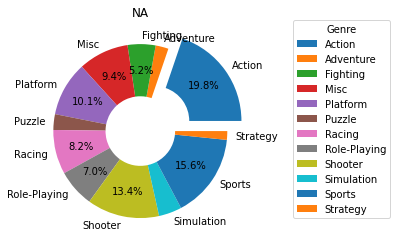

In [51]:
def customPct(pct):
  return('%.1f%%'%pct) if pct>=5 else ''

plt.pie(Genre_data.iloc[:,1],
        labels = Genre_data.index, 
        autopct = customPct,
        explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        wedgeprops = {'width':0.6},
        pctdistance = 0.7)
plt.legend(loc=(1.2, 0.1), title = 'Genre')
plt.title('NA')
plt.show()

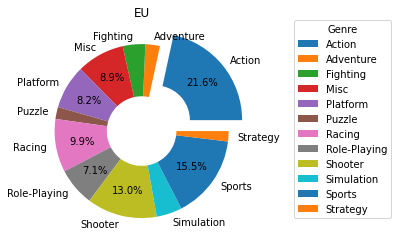

In [52]:
def customPct(pct):
  return('%.1f%%'%pct) if pct>=5 else ''

plt.pie(Genre_data.iloc[:,2],
        labels = Genre_data.index, 
        autopct = customPct,
        explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        wedgeprops = {'width':0.6},
        pctdistance = 0.7)
plt.legend(loc=(1.2, 0.1), title = 'Genre')
plt.title('EU')
plt.show()

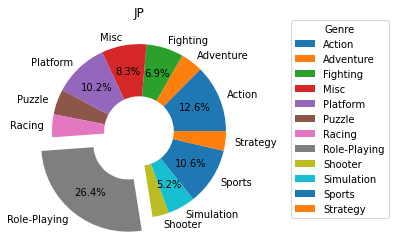

In [53]:
def customPct(pct):
  return('%.1f%%'%pct) if pct>=5 else ''

plt.pie(Genre_data.iloc[:,3],
        labels = Genre_data.index, 
        autopct = customPct,
        explode = [0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0],
        wedgeprops = {'width':0.6},
        pctdistance = 0.7)
plt.legend(loc=(1.2, 0.1), title = 'Genre')
plt.title('JP')
plt.show()

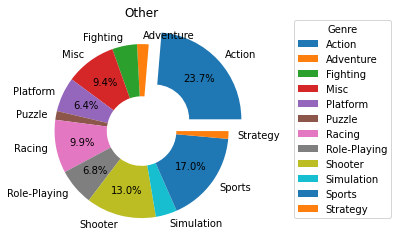

In [54]:
def customPct(pct):
  return('%.1f%%'%pct) if pct>=5 else ''

plt.pie(Genre_data.iloc[:,4],
        labels = Genre_data.index, 
        autopct = customPct,
        explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        wedgeprops = {'width':0.6},
        pctdistance = 0.7)
plt.legend(loc=(1.2, 0.1), title = 'Genre')
plt.title('Other')
plt.show()

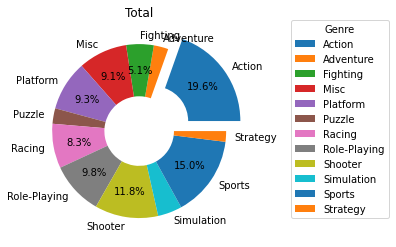

In [55]:
def customPct(pct):
  return('%.1f%%'%pct) if pct>=5 else ''

plt.pie(Genre_data.iloc[:,5],
        labels = Genre_data.index, 
        autopct = customPct,
        explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        wedgeprops = {'width':0.6},
        pctdistance = 0.7)
plt.legend(loc=(1.2, 0.1), title = 'Genre')
plt.title('Total')
plt.show()

In [ ]:
# 일본에서 Role-Playing 게임이 가장 선호되어 지역별 선호 게임 장르 차이가 있음을 확인하였습니다.

In [ ]:
# 연도별 게임트렌드

In [56]:
# df_action = fin_data.loc[fin_data['Genre']=='Action']
# df_action_year = df_action.groupby('Year').mean()
df_Genre = fin_data.groupby(['Year','Genre']).mean()
df_Genre.head()

NA        EU   JP     Other     Total
Year Genre                                                
1980 Action    0.320000  0.020000  0.0  0.000000  0.340000
     Fighting  0.720000  0.040000  0.0  0.010000  0.770000
     Misc      0.770000  0.046667  0.0  0.006667  0.823333
     Shooter   3.280000  0.215000  0.0  0.040000  3.535000
1981 Action    0.500833  0.029167  0.0  0.004167  0.534167

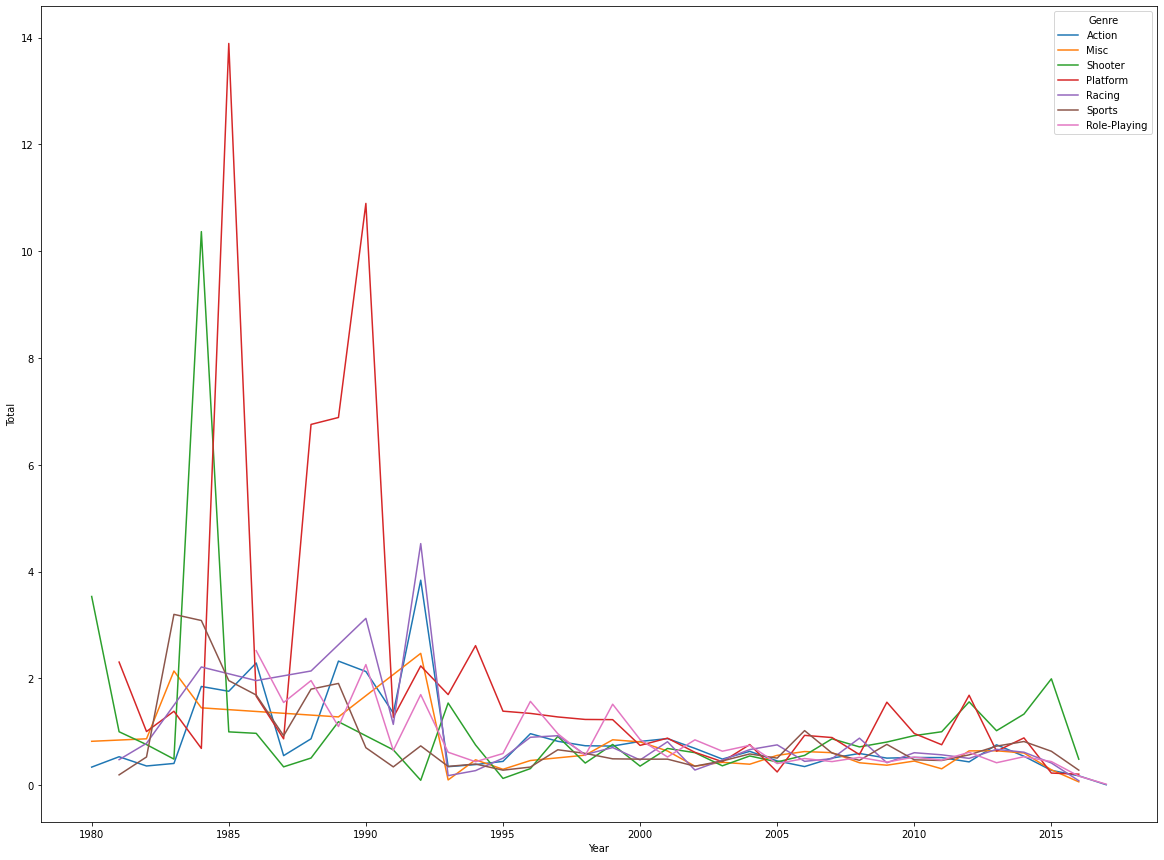

In [57]:
temp_Genre = ['Action','Sports','Shooter','Role-Playing','Racing','Platform','Misc']
df_temp = fin_data[fin_data['Genre'].isin(temp_Genre)]

df_temp_Genre = df_temp.groupby(['Year','Genre']).mean()

fig = plt.figure(figsize = (20,15))
sns.lineplot(data=df_temp_Genre, x='Year', y= 'Total', hue = 'Genre')
plt.show()

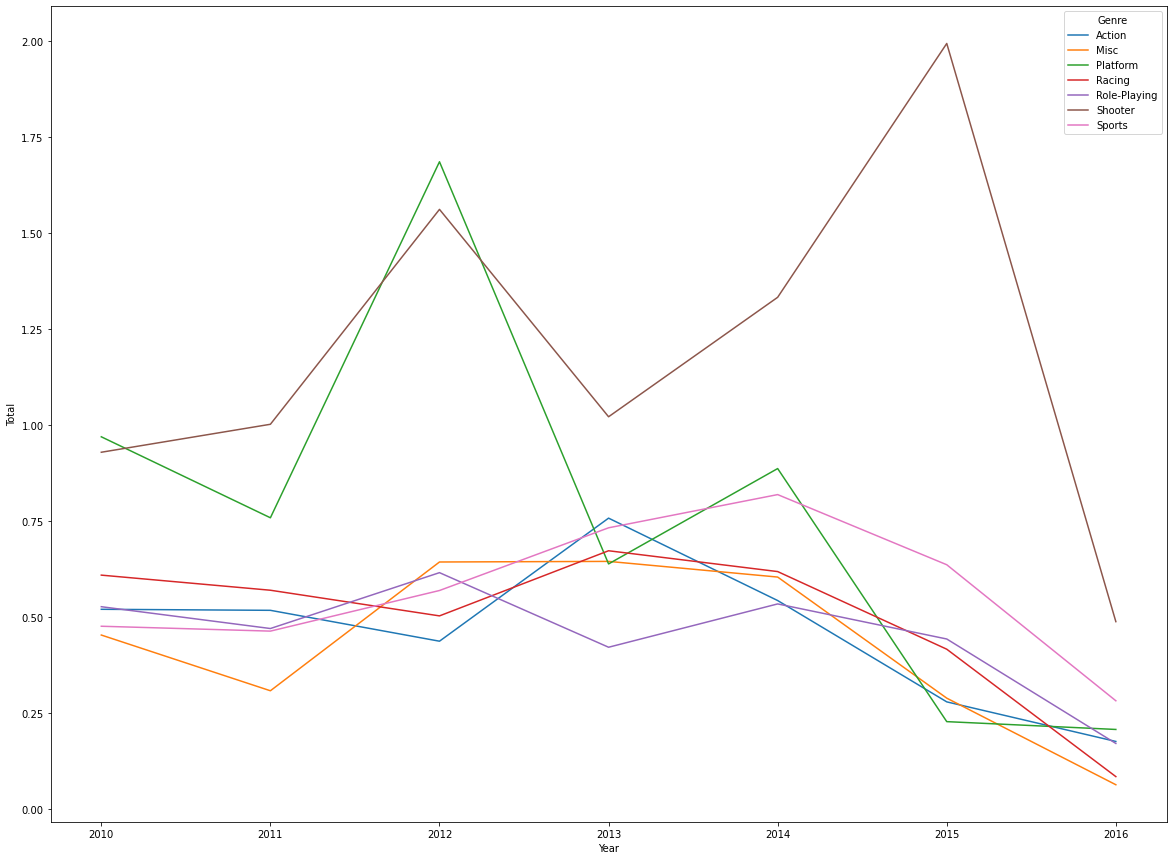

In [58]:
temp_Genre = ['Action','Sports','Shooter','Role-Playing','Racing','Platform','Misc']
df_temp = fin_data[fin_data['Genre'].isin(temp_Genre)]
temp_Year = [2010,2011,2012,2013,2014,2015,2016]
df_temp_year = df_temp[df_temp['Year'].isin(temp_Year)]

df_temp_Genre2 = df_temp_year.groupby(['Year','Genre']).mean()

fig = plt.figure(figsize = (20,15))
sns.lineplot(data=df_temp_Genre2, x='Year', y= 'Total', hue = 'Genre')
plt.show()

In [ ]:
# 연도별 장르 평균을 보면 80년대~90년대 초반 플랫폼과 슈터 장르가 유행했고, 시간이 흐르면서 이전과 같은 드라마틱하게 주도적인 게임은 보이지 않습니다. 
# 다만 세세하게 최근 십년을 살펴보면 슈터와 플랫폼 장르가 강세임을 알 수 있습니다. 
# 앞서 나라별 선호 장르에서 rpg를 선호하는 일본 외의 지역에서 액션과 슈터 게임이 강세였던 것과 다른 양상인데, 
# 연도별 각 장르 게임의 평균 출고량 비교이기 때문입니다. 
# 다음에서 장르별 게임의 개수를 파악해보면, 액션 게임 종류가 가장 많이 출시되었고, 플랫폼 게임은 출고량 대비 게임 출시가 적음을 알 수 있습니다.

# 때문에 각 매출적인 측면에서 보는 것이 좋을 것 같은데, 해당 데이터를 확보하지 못했으므로 가능한 선에서 비교하겠습니다.

In [59]:
# 장르별 count_value()

fin_data.Genre.value_counts()

Action          3077
Sports          2185
Misc            1584
Role-Playing    1384
Adventure       1219
Shooter         1213
Racing          1151
Platform         809
Simulation       801
Fighting         794
Strategy         626
Puzzle           539
Name: Genre, dtype: int64

In [60]:
fin_data.sort_values(['Total'], ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [61]:
fin_data.sort_values(['NA'], ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
13111,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62


In [62]:
temp = fin_data.drop(index = fin_data[fin_data['Platform']=='Wii'].index)
temp = temp.drop(index = temp[temp['Year']<2010].index)
world_top10 = temp.sort_values(['Total'], ascending=False).head(10).reset_index(drop = True)
world_top10

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total
0,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
4,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
5,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
6,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
7,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
8,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
9,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21


In [ ]:
# 위는 닌텐도 위 플랫폼과, 2010년 이전을 제거하고 토탈 출고량 상위 10개 게임입니다.
# 액티비전의 콜오브듀티와 닌텐도 마리오가 상위에 랭크되어 있어 장르보다도 특정 게임에 대한 충성도가 높음을 짐작할 수 있습니다.
# 콜오브듀티 시리즈 중 하나는 플랫폼만 다르게 출시했음에도 5,6위에 동시 랭크하였음을 볼 수 있습니다.
# 아래는 해당 항목에서 북미의 상위 10개 항목입니다.
# 액티비전의 슈터 게임인 콜오브듀티, 테이크투 인터랙티브의 GTA 시리즈가 눈에 띕니다.

In [63]:
temp.sort_values(['NA'], ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
5604,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21
14576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
9924,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
9994,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20


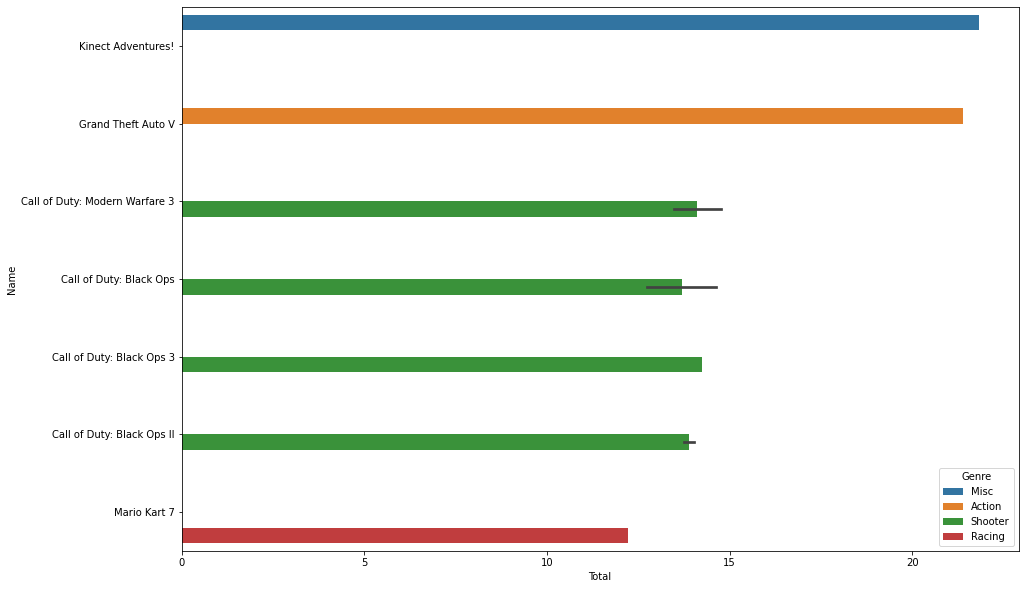

In [64]:
fig = plt.figure(figsize = (15,10))
sns.barplot(data=world_top10, x='Total', y='Name', hue='Genre')

In [ ]:
# 최근 10년간 슈터 게임이 강세를 보이고 있지만 북미에서의 콜오브듀티 시리즈의 흥행이 큰 영향을 미치고 있습니다.

In [65]:
temp_drop = temp[~temp['Name'].str.contains('Call of Duty')]
temp_drop.sort_values(['Total'], ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
11123,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
12623,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
6216,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
10379,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,3.66,3.07,2.47,0.63,9.83
14576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
9994,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20


In [66]:
temp_drop2 = temp_drop[~temp_drop['Name'].str.contains('Mario')]
temp_drop3 = temp_drop2[~temp_drop2['Name'].str.contains('Pokemon')]
temp_drop4 = temp_drop3[~temp_drop3['Name'].str.contains('FIFA')]
world_top20 = temp_drop4.sort_values(['Total'], ascending=False).head(20)
world_top20

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
6216,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
14576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
9994,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
8906,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.10
3024,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
12850,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
9452,Battlefield 3,PS3,2011,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23


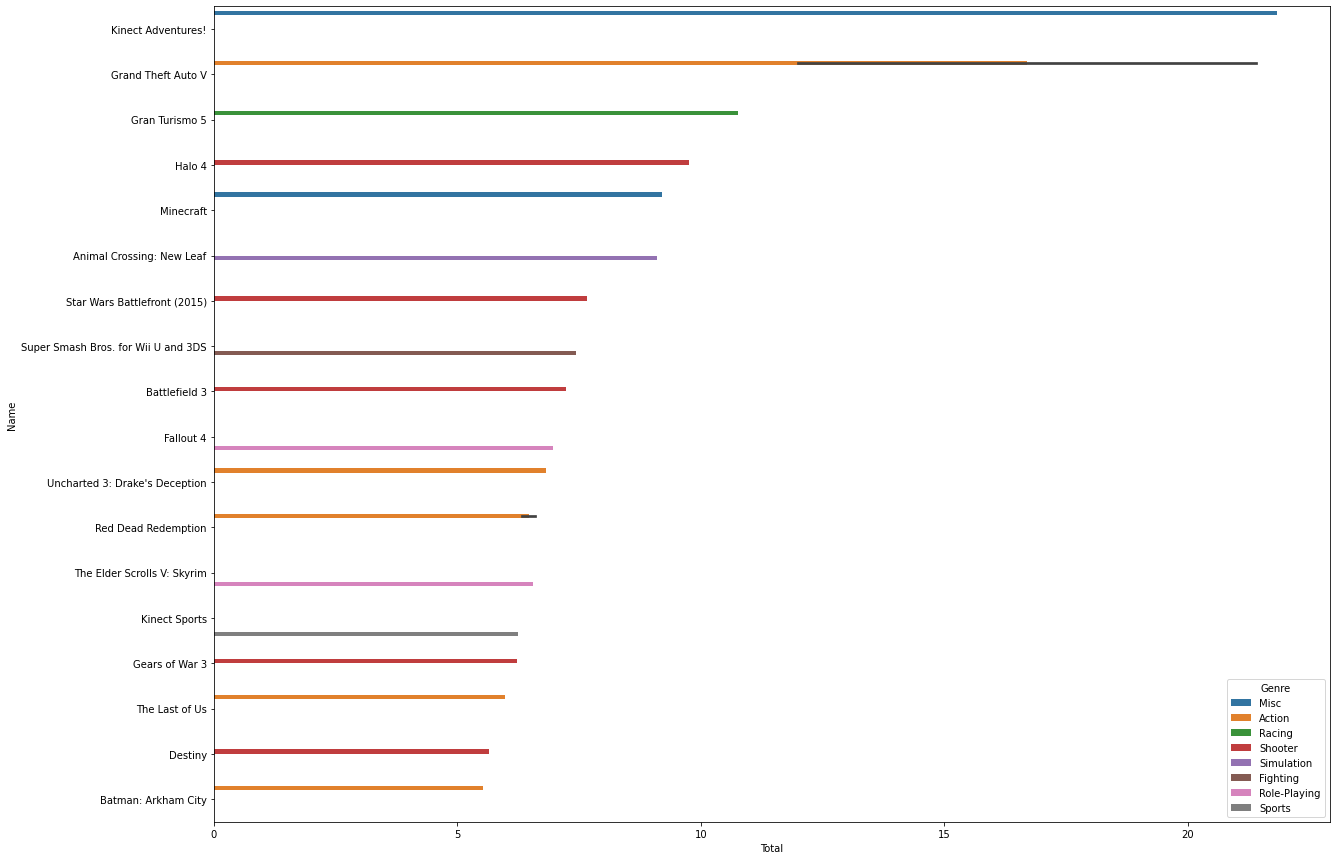

In [67]:
plt.figure(figsize=(20,15))
sns.barplot(data=world_top20, x='Total', y ='Name', hue='Genre')
plt.show()

In [ ]:
# 따라서, 특정 ip에 의존하거나, 시즌 연속성을 띄어 충성고객을 확보한  
# 마리오, 포켓몬, 피파, 콜오브듀티를 제한 뒤의 탑20을 확인하였습니다.
# 흥행하는 특정 시리즈를 제외 시 전체 출고량 상위 20위에 랭크된 게임의 비중 중 액션과 슈터 장르가 많음을 알 수 있습니다.

In [68]:
world_top20['Genre'].value_counts()

Action          7
Shooter         5
Misc            2
Role-Playing    2
Racing          1
Simulation      1
Fighting        1
Sports          1
Name: Genre, dtype: int64

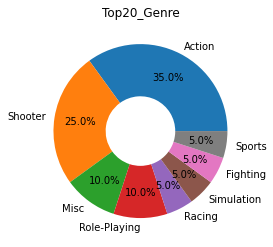

In [69]:
world_genre = world_top20['Genre'].value_counts()

def customPct(pct):
  return('%.1f%%'%pct) if pct>=5 else ''

plt.pie(world_genre, 
        labels = world_genre.index,
        autopct = customPct,
        wedgeprops = {'width':0.6},
        pctdistance = 0.7)
plt.title('Top20_Genre')
plt.show()

In [ ]:
# 따라서, 일본 지역을 타겟팅할 것이 아니라면, 액션과 슈터 게임을 출시하는 것이 좋으리라 판단됩니다.
# 다만 각 매출액을 알 수 없다는 점, 첫 출시 때 판매량이 다가 아니라는 점이 한계 입니다. 
# 이와 관련하여 추가적인 데이터 수집을 요청드립니다.